<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <table>
                    <tr>
                        <td>
                            <img src="https://d1nhio0ox7pgb.cloudfront.net/_img/v_collection_png/512x512/shadow/home.png" style="max-width: 60px; display: block;">
                        </td>
                        <td>
                            <font color=blue size="5px">
                                <b>Smart Predictive Modeling for Rental Property Prices
</b>
                            </font>
                        </td>
                    </tr>
                </table>
            </div>
            <p style="text-align:center; margin-top: 10px;">
                <span style="color: green;">Copyright (©)  Vengatesan-K. All Rights Reserved.</span>
            </p>
        </td>
    </tr>
</table>



## 📊Exploratory Data Analysis :

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [2]:
df_trained = pd.read_csv('trained_house_data.csv')

#### 🧱Correlation Analysis:

> How does the number of bedrooms and bathrooms affect the rent price?

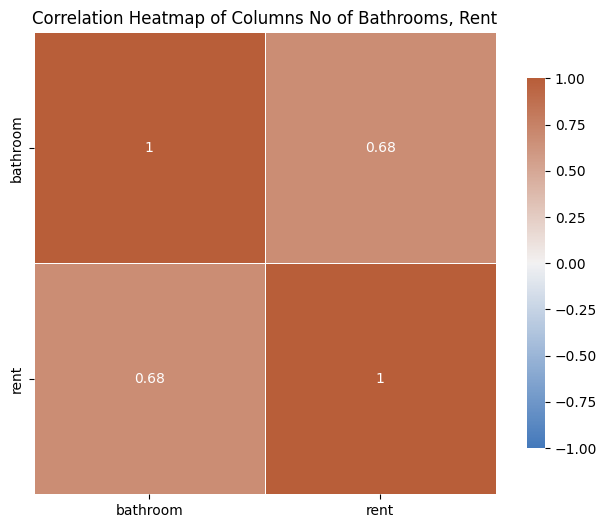

In [78]:
selected_columns = ['bathroom', 'rent']
df_selected1 = df_trained[selected_columns]
correlation_matrix = df_selected1.corr()

f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Columns No of Bathrooms, Rent')
plt.show()

> Is there a correlation between the property size and rent price?

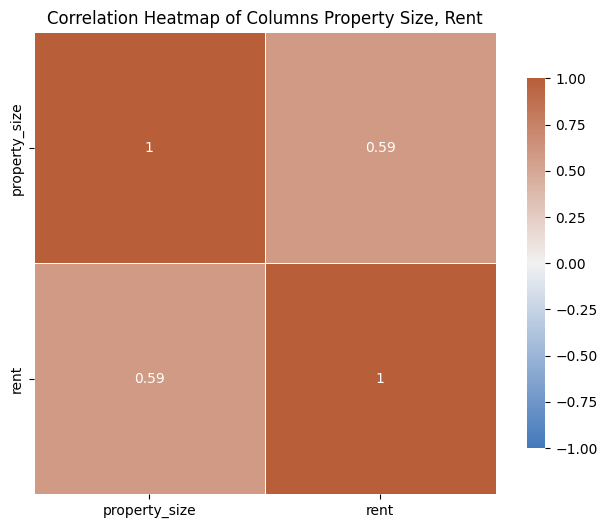

In [79]:
selected_columns = ['property_size', 'rent']
df_selected2 = df_trained[selected_columns]
correlation_matrix = df_selected2.corr()

f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Columns Property Size, Rent')
plt.show()

> Do properties with more amenities tend to have higher rent prices?

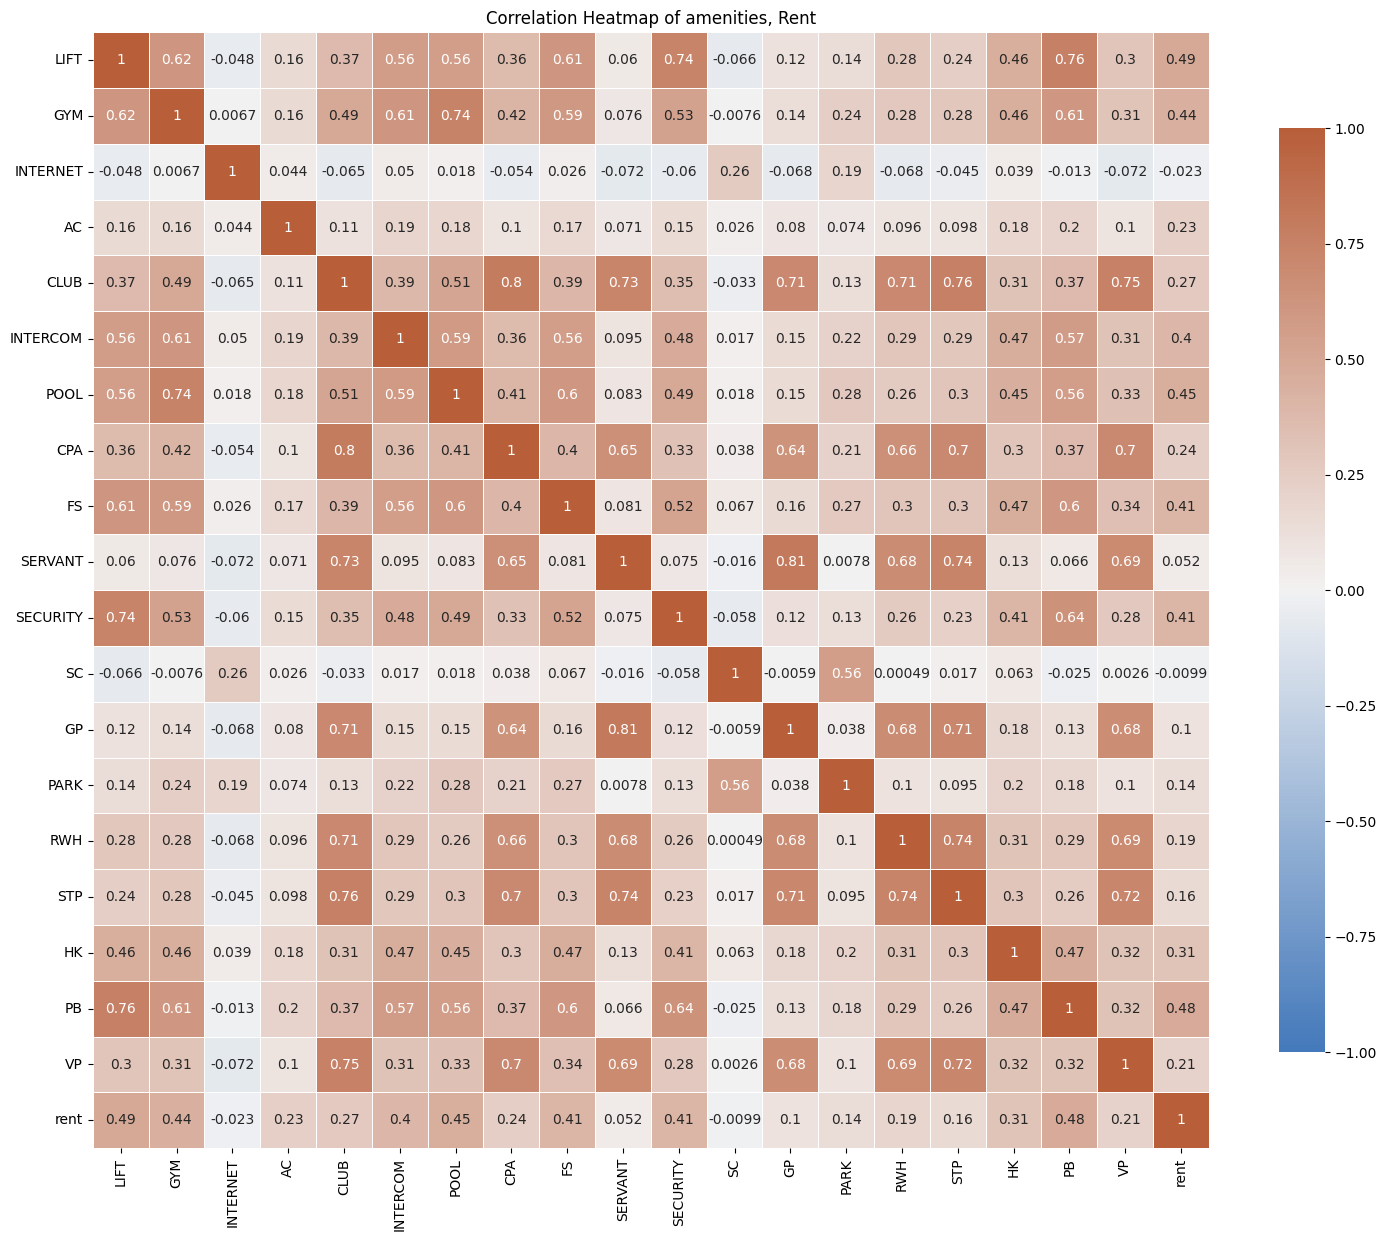

In [80]:
selected_columns = ['LIFT', 'GYM', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP', 'rent']
df_selected3 = df_trained[selected_columns]
correlation_matrix = df_selected3.corr()

f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of amenities, Rent')
plt.show()

In [81]:
df_corr = df_trained.drop(['id','locality','activation_date'], axis=1)
df_corr

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
0,0.568993,12.929557,77.672280,0.472270,0,1,0,1,1.0,2.0,...,0,1,1,0,1,1,1,0,1,1
1,0.213882,12.982870,80.262012,0.496193,0,1,0,0,1.0,2.0,...,0,0,1,0,1,0,0,0,1,1
2,0.175664,12.955991,77.531634,0.496193,0,0,0,1,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.213882,12.963903,77.649446,0.496193,0,0,0,1,1.0,2.0,...,0,0,0,0,1,0,0,0,0,1
4,0.175664,12.986196,77.718314,0.496193,1,1,1,1,1.0,2.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20352,0.175664,12.979762,77.615395,0.472270,0,1,0,1,1.0,0.0,...,0,1,1,1,1,0,0,1,0,1
20353,0.568993,12.931072,77.632361,0.472270,0,0,0,1,1.0,2.0,...,0,0,1,0,1,1,0,0,0,0
20354,0.568993,12.901800,77.566597,0.496193,1,1,0,1,1.0,2.0,...,0,1,0,0,1,0,0,0,1,0
20355,0.568993,12.965502,77.647694,0.496193,0,1,0,0,1.0,2.0,...,0,1,1,0,1,0,0,1,1,1


In [82]:
df_trained_corr = df_corr.corr()
df_trained_corr

,type,latitude,longitude,lease_type,gym,lift,swimming_pool,negotiable,furnishing,parking,...,SERVANT,SECURITY,SC,GP,PARK,RWH,STP,HK,PB,VP
type,1.000000,0.020318,-0.018220,0.179433,0.003237,0.047357,-0.026930,0.024374,-0.000199,0.046671,...,-0.007586,0.028818,-0.024225,0.000637,-0.006975,0.004166,0.005074,-0.010031,0.017265,0.000370
latitude,0.020318,1.000000,0.194260,-0.009221,0.034848,0.018849,0.033897,-0.009860,-0.012273,0.021714,...,0.022830,0.028121,-0.008557,0.000372,-0.019526,0.030828,0.038131,0.009124,0.042120,0.034400
longitude,-0.018220,0.194260,1.000000,-0.012117,0.245286,0.207901,0.229202,-0.023936,0.073148,0.120327,...,0.040637,0.226606,-0.010144,0.042748,0.069906,0.129098,0.134148,0.179915,0.255793,0.148314
lease_type,0.179433,-0.009221,-0.012117,1.000000,0.071954,0.092313,0.060069,0.031274,-0.015937,0.083068,...,0.005317,0.072711,-0.014972,0.017017,0.000773,0.030729,0.021039,0.032614,0.074926,0.028285
gym,0.003237,0.034848,0.245286,0.071954,1.000000,0.644861,0.769674,0.009291,0.158857,0.300376,...,-0.031587,0.522573,-0.010404,0.038808,0.225415,0.194645,0.197300,0.428974,0.587280,0.232971
lift,0.047357,0.018849,0.207901,0.092313,0.644861,1.000000,0.564556,0.011717,0.196868,0.402506,...,-0.088116,0.692458,-0.062856,-0.018509,0.132389,0.163924,0.109261,0.412234,0.711446,0.180673
swimming_pool,-0.026930,0.033897,0.229202,0.060069,0.769674,0.564556,1.000000,0.009985,0.136137,0.266275,...,-0.008825,0.463540,0.016310,0.066937,0.263843,0.193361,0.224505,0.411841,0.526243,0.259587
negotiable,0.024374,-0.009860,-0.023936,0.031274,0.009291,0.011717,0.009985,1.000000,-0.001660,0.037440,...,0.000420,0.008170,0.039580,0.019218,0.042619,0.030596,0.016319,0.025534,0.026766,0.028866
furnishing,-0.000199,-0.012273,0.073148,-0.015937,0.158857,0.196868,0.136137,-0.001660,1.000000,0.136747,...,0.048652,0.190457,0.000985,0.083006,0.062141,0.119091,0.096373,0.152789,0.226175,0.115675
parking,0.046671,0.021714,0.120327,0.083068,0.300376,0.402506,0.266275,0.037440,0.136747,1.000000,...,0.142150,0.400261,-0.031217,0.163141,0.070086,0.237418,0.208015,0.239116,0.394626,0.260571


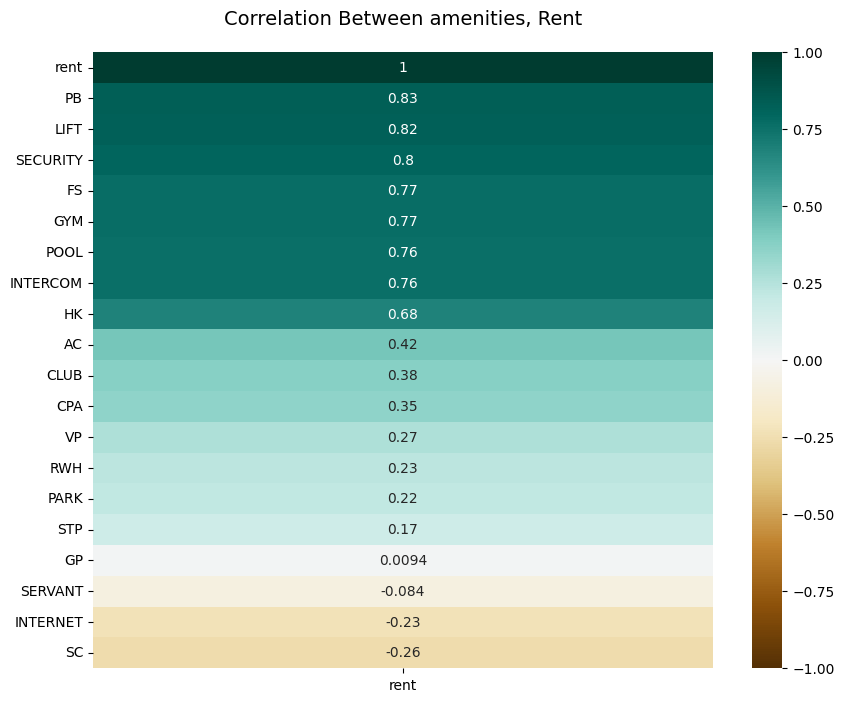

In [83]:
selected_columns = ['LIFT', 'GYM', 'INTERNET', 'AC',
       'CLUB', 'INTERCOM', 'POOL', 'CPA', 'FS', 'SERVANT', 'SECURITY', 'SC',
       'GP', 'PARK', 'RWH', 'STP', 'HK', 'PB', 'VP', 'rent']
selected_corr = df_trained_corr[selected_columns].corr()

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(
    selected_corr[["rent"]].sort_values(by="rent", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
) 
heatmap.set_title(
    'Correlation Between amenities, Rent',
    fontdict={'fontsize': 14},
    pad=20
)
plt.show()

#### 🗺️GeoSpatial Analysis

> Are there specific localities or neighborhoods where rent prices are generally higher?

In [84]:
locality_rent = df_trained.groupby('locality')['rent'].mean().reset_index()

locality_rent_sorted = locality_rent.sort_values(by='rent', ascending=False)

top_localities = locality_rent_sorted.head(15) 
print(top_localities)

                                               locality     rent
958            Junnasandra, Bengaluru, Karnataka, India  50000.0
1665                          Tasker Town,Shivaji Nagar  50000.0
1111  Krishvi Dhavala, Doddakannelli, Bellandur, Ben...  50000.0
486                          Chennammanakere Achukattu,  50000.0
542                        Devarabisanahalli, Bellandur  50000.0
1352  Outer Ring Road, Marathahalli, Bengaluru, Karn...  48000.0
868                                    JP Nagar Phase 1  48000.0
727      Halanayakanahalli, Bengaluru, Karnataka, India  47500.0
1528       Sarjapur, Bengaluru, Karnataka 562125, India  46000.0
455                          Cauvery Colony,Koramangala  45000.0
593   EPIP Zone Whitefield Road, Near ITPB. Bengalur...  45000.0
1146                      Lakkasandra Extension,Adugodi  45000.0
1664                                        Tasker Town  45000.0
615                                        Frazer Trown  45000.0
1105                  Kri

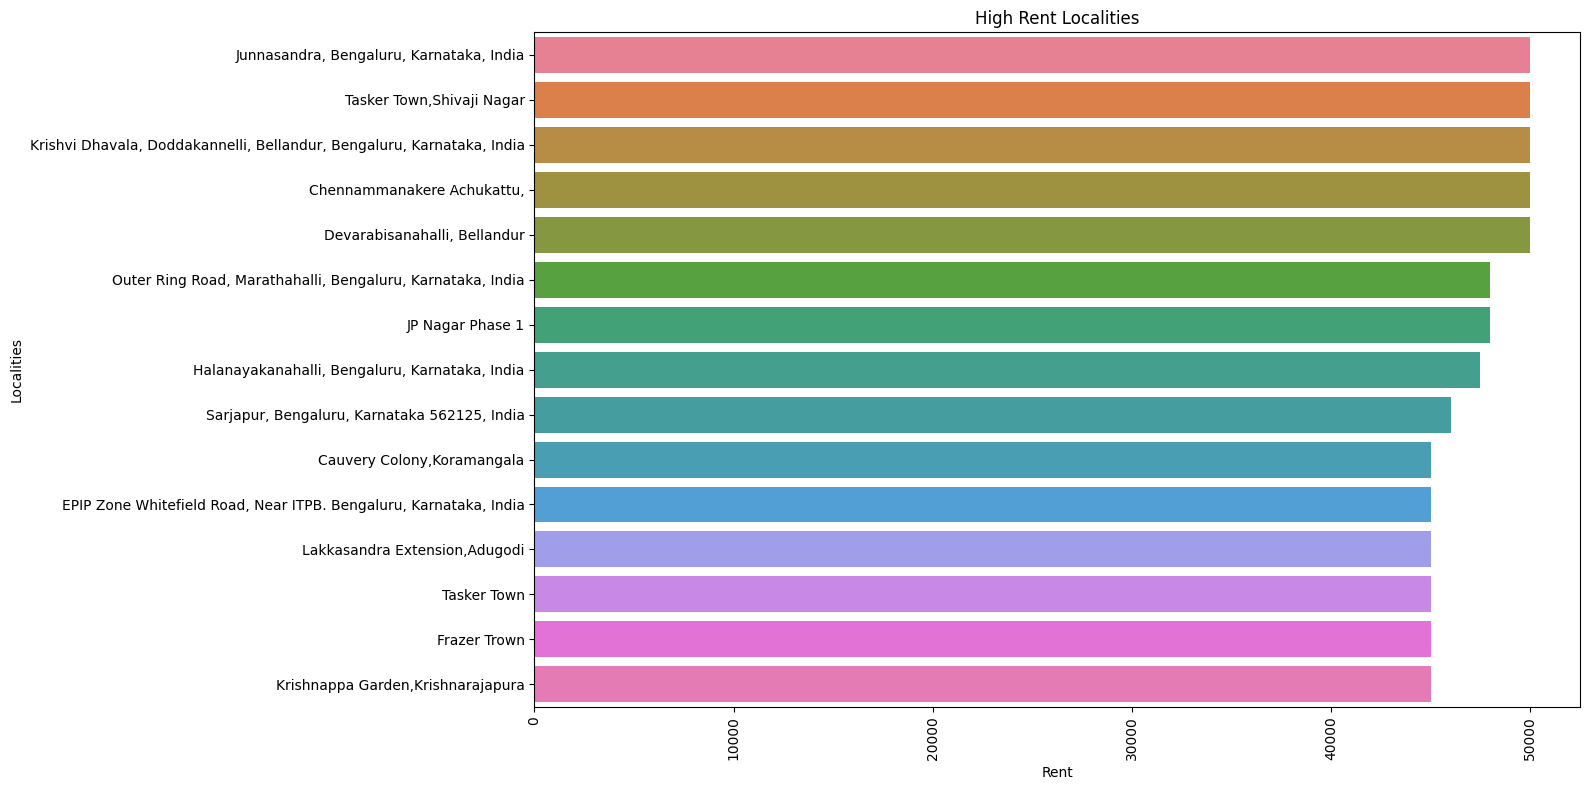

In [85]:
plt.figure(figsize=(16, 8))
sns.barplot(y='locality', x='rent', data=top_localities, hue='locality')
plt.xticks(rotation=90)
plt.ylabel('Localities')
plt.xlabel('Rent')
plt.title('High Rent Localities')
plt.tight_layout()
plt.show()

> Is there any correlation between latitude/longitude and rent prices?

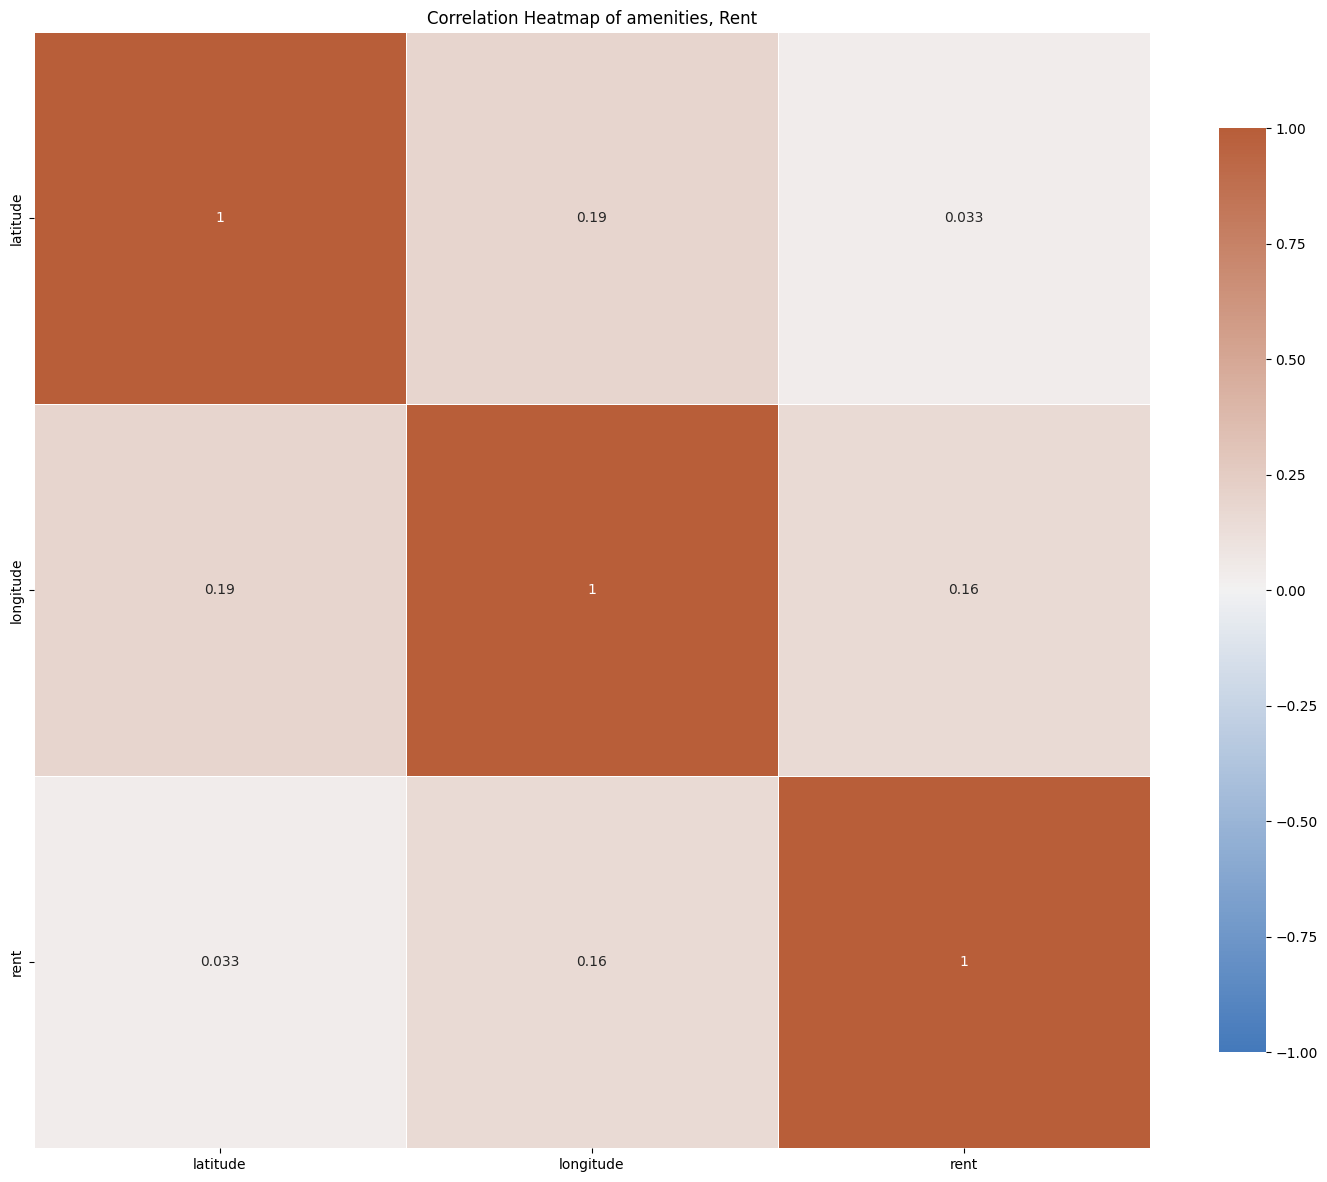

In [86]:
selected_columns = ['latitude', 'longitude', 'rent']
df_selected3 = df_trained[selected_columns]
correlation_matrix = df_selected3.corr()

f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of amenities, Rent')
plt.show()

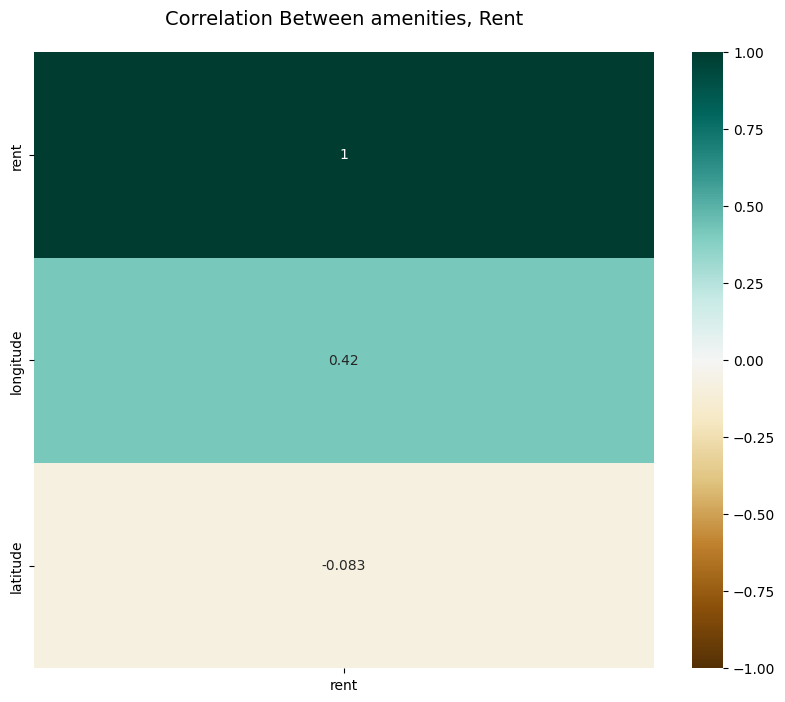

In [87]:
selected_columns = ['latitude', 'longitude', 'rent']
selected_corr = df_trained_corr[selected_columns].corr()

plt.figure(figsize=(10, 8))

heatmap = sns.heatmap(
    selected_corr[["rent"]].sort_values(by="rent", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
) 
heatmap.set_title(
    'Correlation Between amenities, Rent',
    fontdict={'fontsize': 14},
    pad=20
)
plt.show()

> How does the availability of amenities like swimming pools, gyms, or parks vary across
different areas?

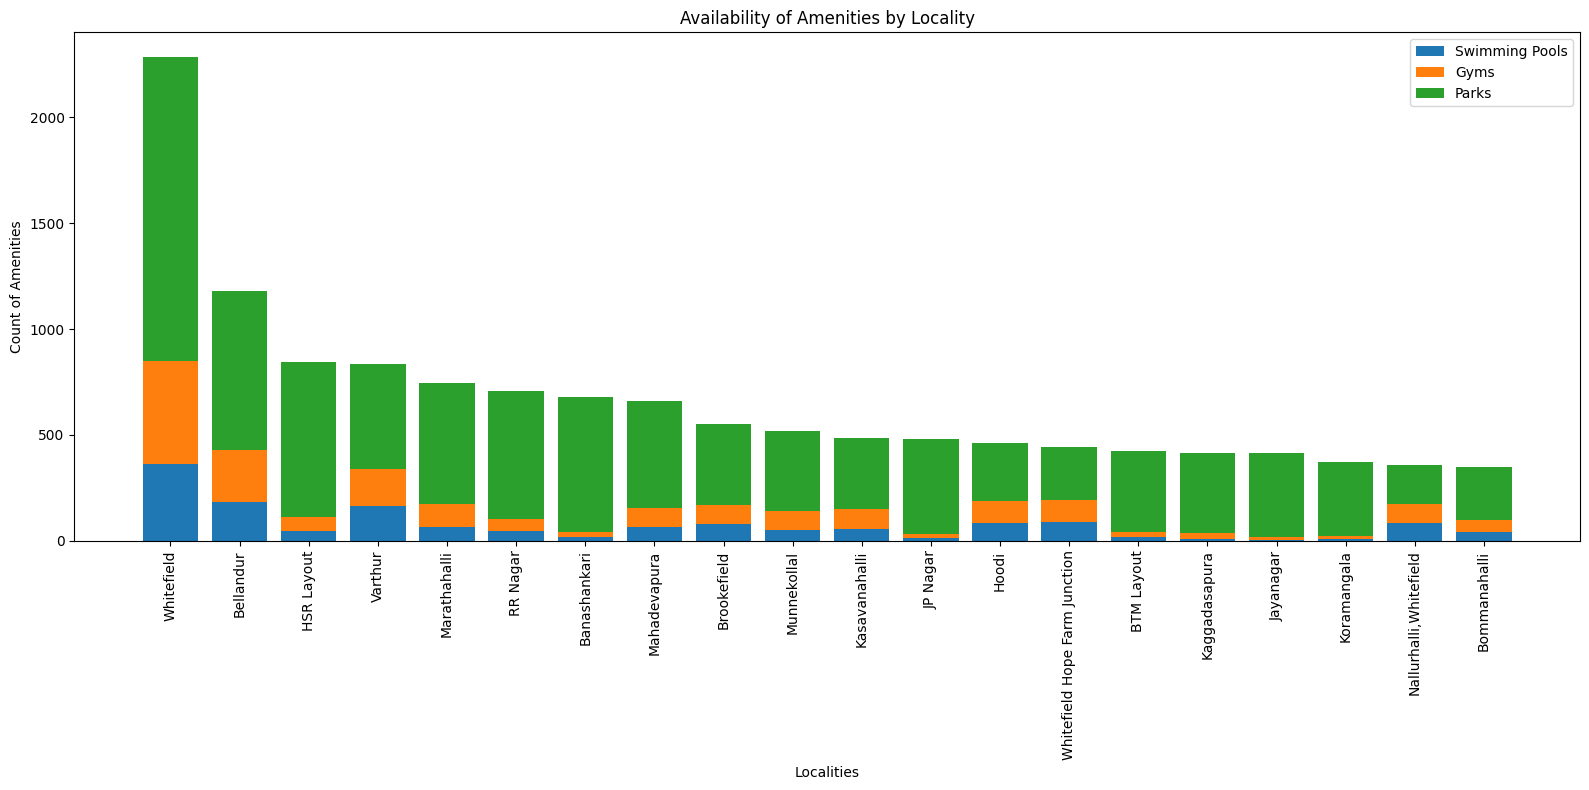

In [88]:
amenities_by_locality = df_trained.groupby('locality')[['swimming_pool', 'gym', 'parking']].sum().reset_index()

amenities_by_locality['total_amenities'] = amenities_by_locality[['swimming_pool', 'gym', 'parking']].sum(axis=1)

amenities_by_locality_sorted = amenities_by_locality.sort_values(by='total_amenities', ascending=False).head(20)

plt.figure(figsize=(16, 8))

plt.bar(amenities_by_locality_sorted['locality'], amenities_by_locality_sorted['swimming_pool'], label='Swimming Pools')
plt.bar(amenities_by_locality_sorted['locality'], amenities_by_locality_sorted['gym'], 
        bottom=amenities_by_locality_sorted['swimming_pool'], label='Gyms')
plt.bar(amenities_by_locality_sorted['locality'], amenities_by_locality_sorted['parking'], 
        bottom=amenities_by_locality_sorted['swimming_pool'] + amenities_by_locality_sorted['gym'], label='Parks')

plt.xlabel('Localities')
plt.ylabel('Count of Amenities')
plt.title('Availability of Amenities by Locality')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()


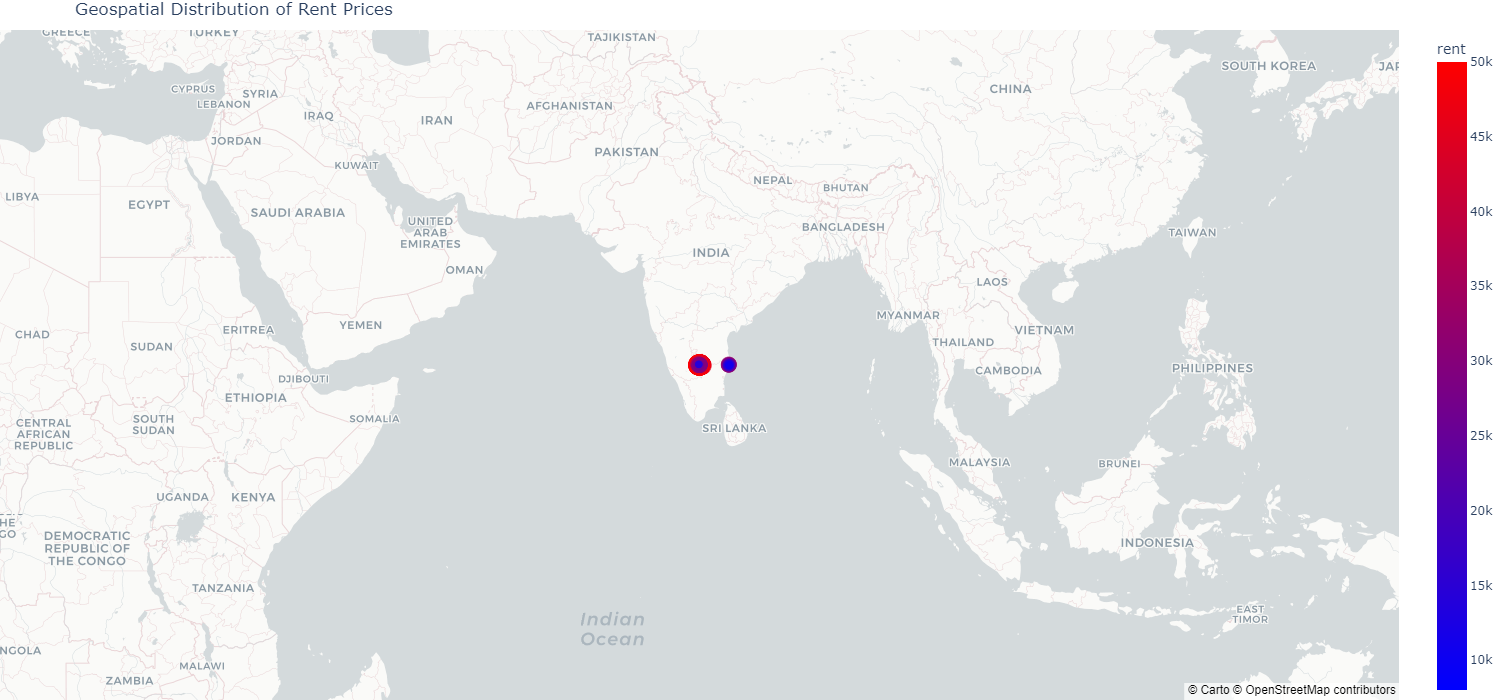

In [7]:
fig = px.scatter_mapbox(df_trained, lat='latitude', lon='longitude', 
                        size='rent', size_max=15, zoom=3,hover_data=['locality'],
                        mapbox_style="carto-positron",
                        hover_name='rent',color='rent', color_continuous_scale=px.colors.sequential.Bluered)

fig.update_layout(title='Geospatial Distribution of Rent Prices')
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show(renderer='png', width=1500, height=700)


#### 📅Temporal Analysis:

> Are there any trends in rent prices based on activation date?

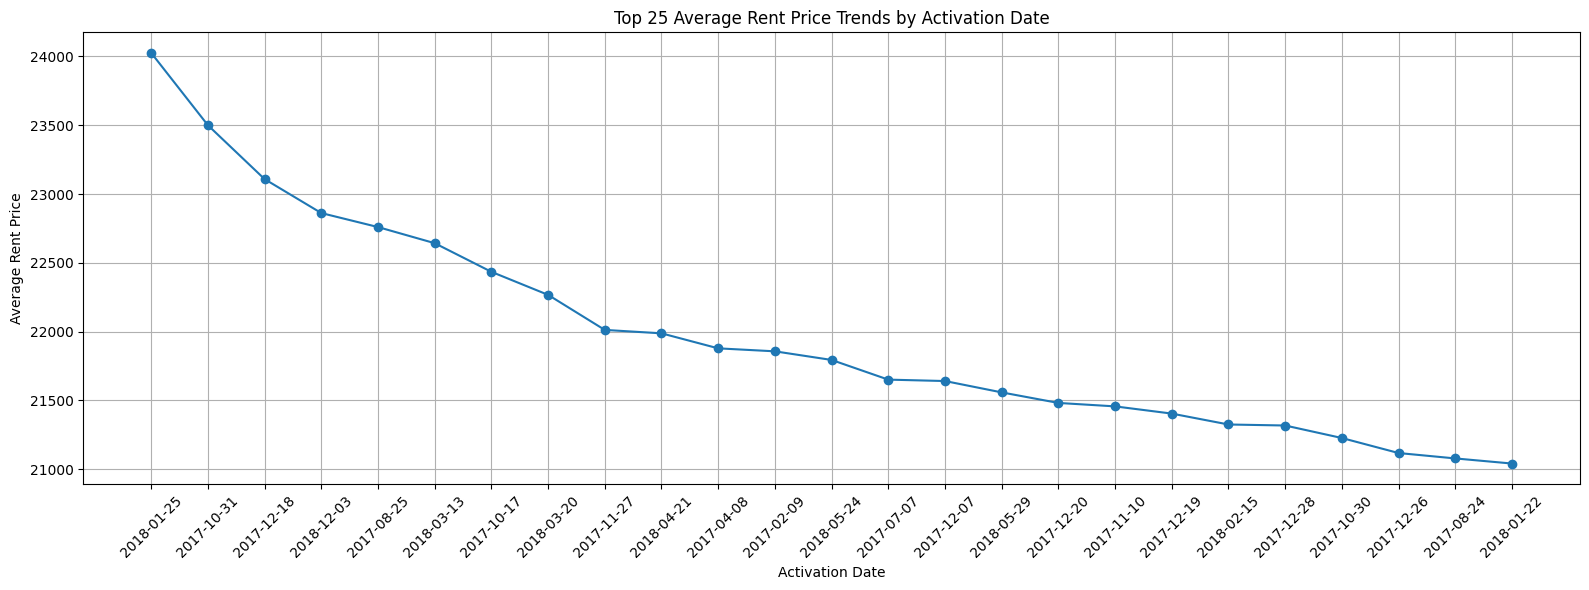

In [90]:
average_prices = df_trained.groupby('activation_date')['rent'].mean().reset_index()

average_prices_top = average_prices.sort_values(by='rent', ascending=False).head(25)

plt.figure(figsize=(16, 6))
plt.plot(average_prices_top['activation_date'], average_prices_top['rent'], marker='o', linestyle='-')

plt.xlabel('Activation Date')
plt.ylabel('Average Rent Price')
plt.title('Top 25 Average Rent Price Trends by Activation Date')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

> Does the property age impact the rent price, and has this relationship changed over time?

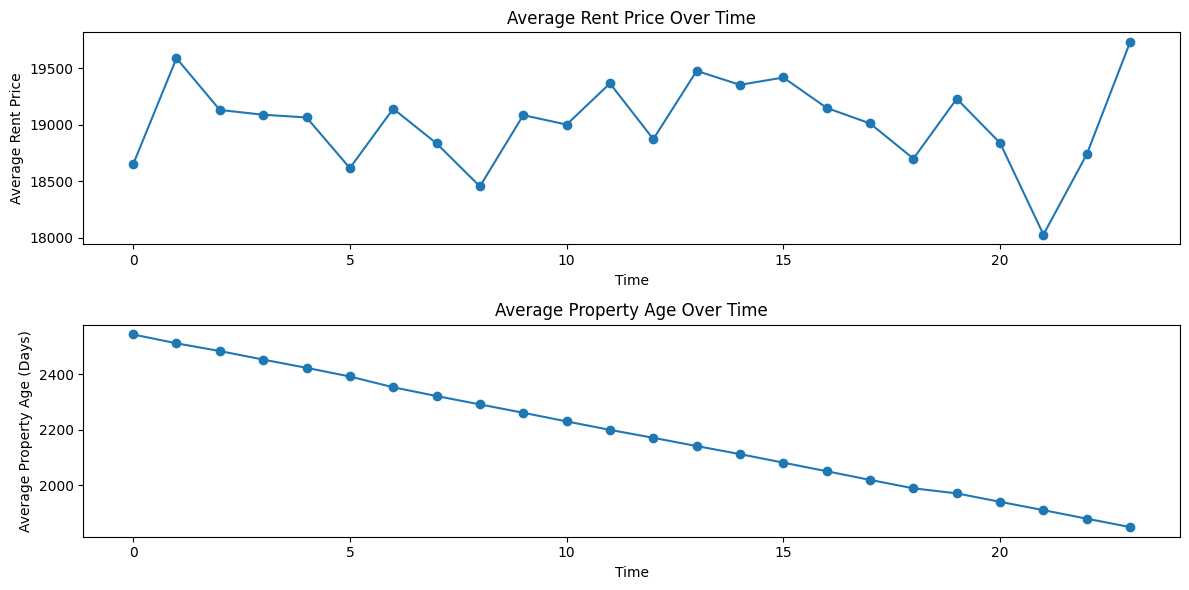

In [91]:
df_trained['activation_date'] = pd.to_datetime(df_trained['activation_date'])

df_trained['property_age_days'] = (pd.to_datetime('today') - df_trained['activation_date']).dt.days

df_trained['year'] = df_trained['activation_date'].dt.year
df_trained['month'] = df_trained['activation_date'].dt.month

rent_age_by_time = df_trained.groupby(['year', 'month']).agg({'rent': 'mean', 'property_age_days': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(rent_age_by_time.index, rent_age_by_time['rent'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price Over Time')

plt.subplot(2, 1, 2)
plt.plot(rent_age_by_time.index, rent_age_by_time['property_age_days'], marker='o')
plt.xlabel('Time')
plt.ylabel('Average Property Age (Days)')
plt.title('Average Property Age Over Time')

plt.tight_layout()
plt.show()

#### 🛗Property Features and Rent:

> How does the presence of certain features like a gym, lift, or parking affect the rent price?

In [92]:
trained_cat_df = pd.read_csv('cleaned_train_data.csv')

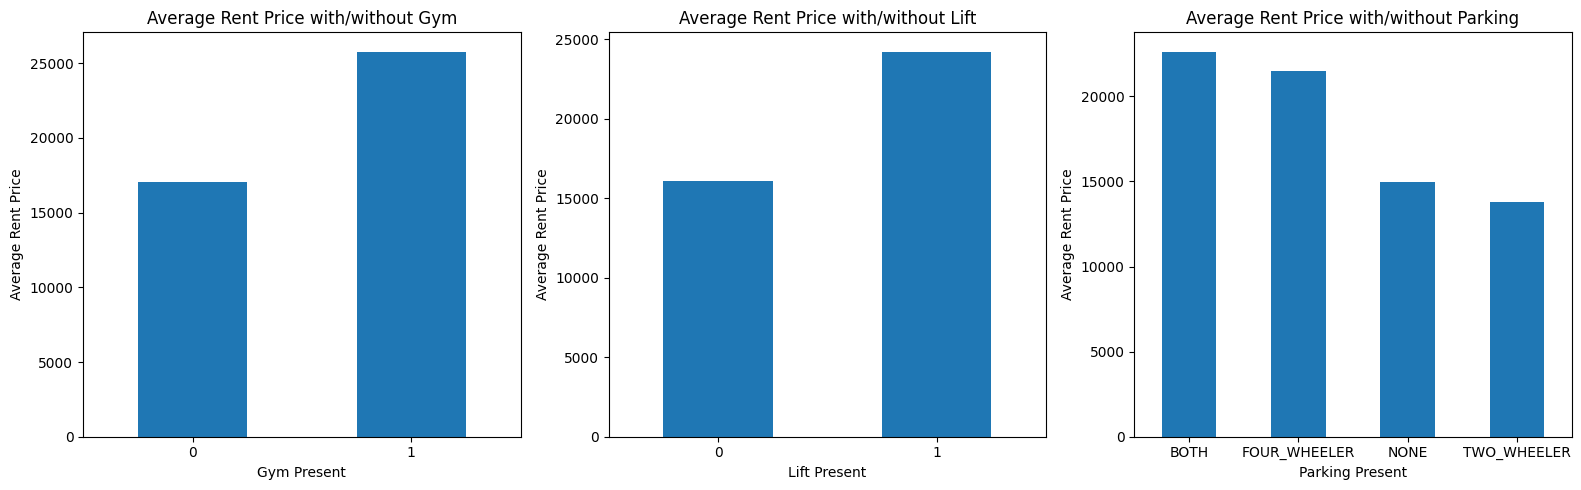

In [93]:
features = ['gym', 'lift', 'parking']  
feature_stats = {}

for feature in features:
    feature_stats[feature] = trained_cat_df.groupby(feature)['rent'].mean()

plt.figure(figsize=(16, 5))

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    feature_stats[feature].plot(kind='bar', rot=0)
    plt.xlabel(f'{feature.capitalize()} Present')
    plt.ylabel('Average Rent Price')
    plt.title(f'Average Rent Price with/without {feature.capitalize()}')

plt.tight_layout()
plt.show()

>  Does the furnishing level (fully furnished, partially furnished, unfurnished) influence the rent?

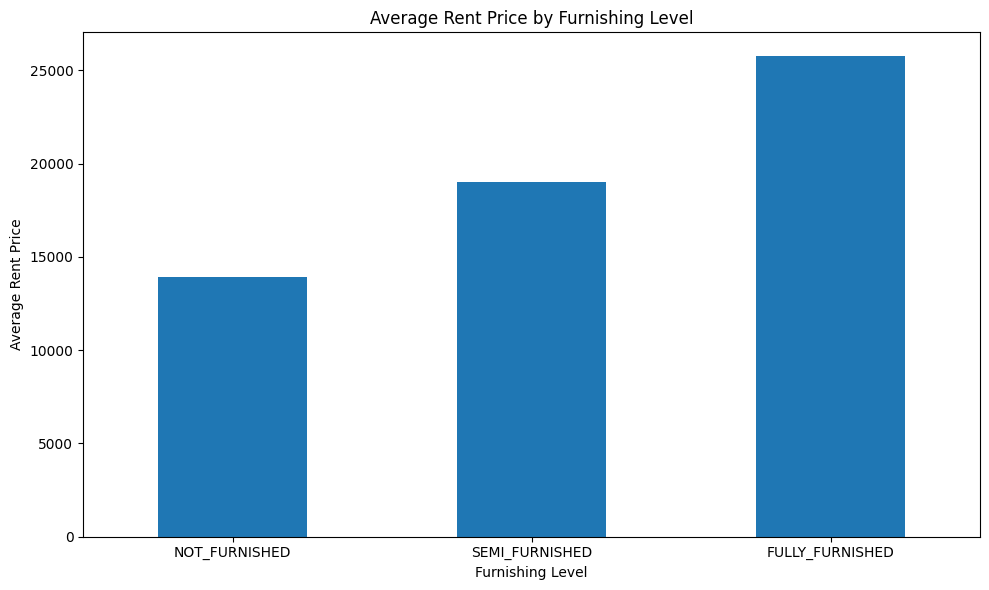

In [94]:
furnishing_stats = trained_cat_df.groupby('furnishing')['rent'].mean().sort_values()

plt.figure(figsize=(10, 6))
furnishing_stats.plot(kind='bar', rot=0)
plt.xlabel('Furnishing Level')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Furnishing Level')
plt.tight_layout()
plt.show()

#### 🏘️Building Characteristics:


>  Is there a difference in rent prices between high-floors and low-floors buildings?

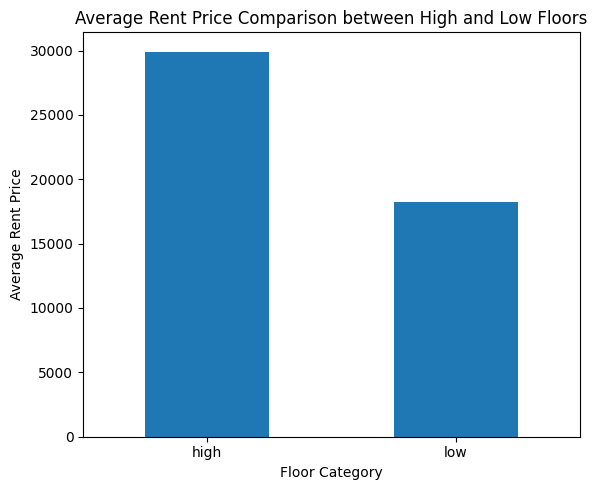

In [100]:
df_trained['floor_category'] = df_trained['total_floor'].apply(lambda x: 'high' if x >= 10 else 'low')

floor_stats = df_trained.groupby('floor_category')['rent'].mean()

plt.figure(figsize=(6, 5))
floor_stats.plot(kind='bar', rot=0)
plt.xlabel('Floor Category')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price Comparison between High and Low Floors')
plt.tight_layout()
plt.show()

> How does the number of total floors in a building relate to the rent price?

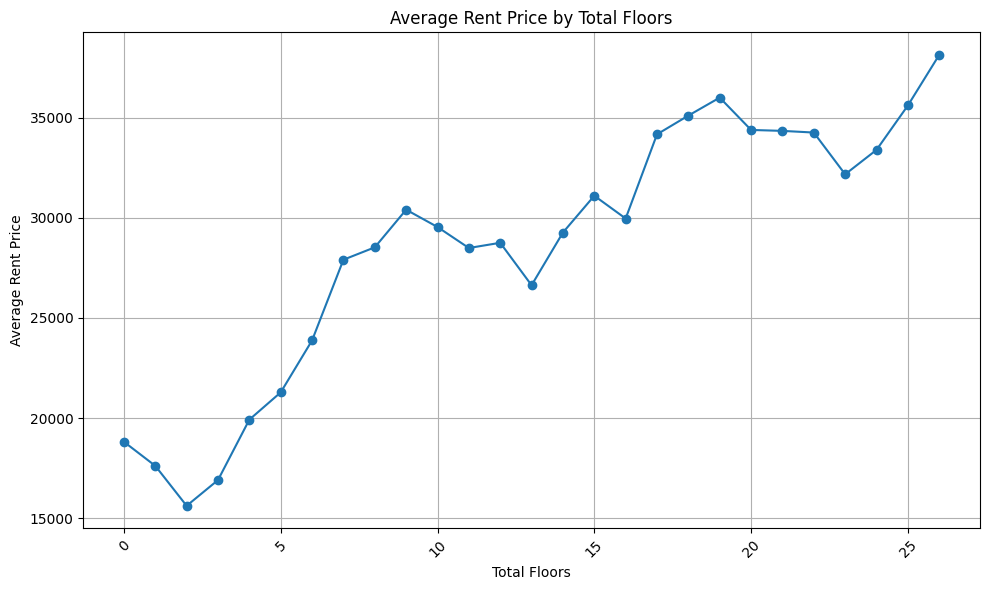

In [103]:
floor_rent_stats = df_trained.groupby('total_floor')['rent'].mean()

plt.figure(figsize=(10, 6))
plt.plot(floor_rent_stats.index, floor_rent_stats.values, marker='o', linestyle='-')
plt.xlabel('Total Floors')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Total Floors')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

#### 💹Negotiability and Rent:

> Do negotiable rent prices tend to be higher or lower than fixed rent prices?

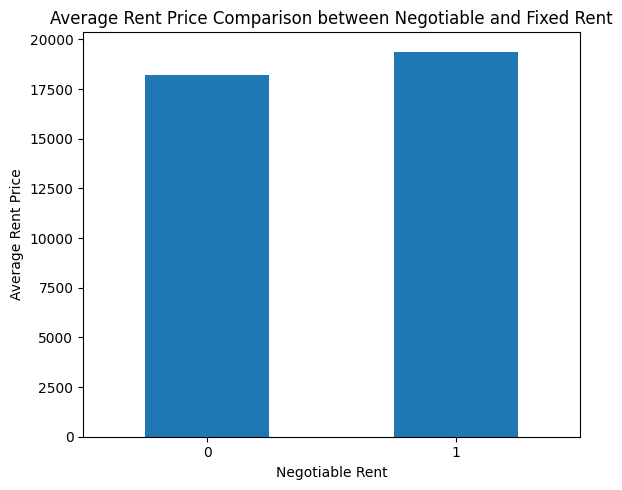

In [106]:
negotiable_stats = df_trained.groupby('negotiable')['rent'].mean()

plt.figure(figsize=(6, 5))
negotiable_stats.plot(kind='bar', rot=0)
plt.xlabel('Negotiable Rent')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price Comparison between Negotiable and Fixed Rent')
plt.tight_layout()
plt.show()

> Is there a difference in rent between family and anyone leases?

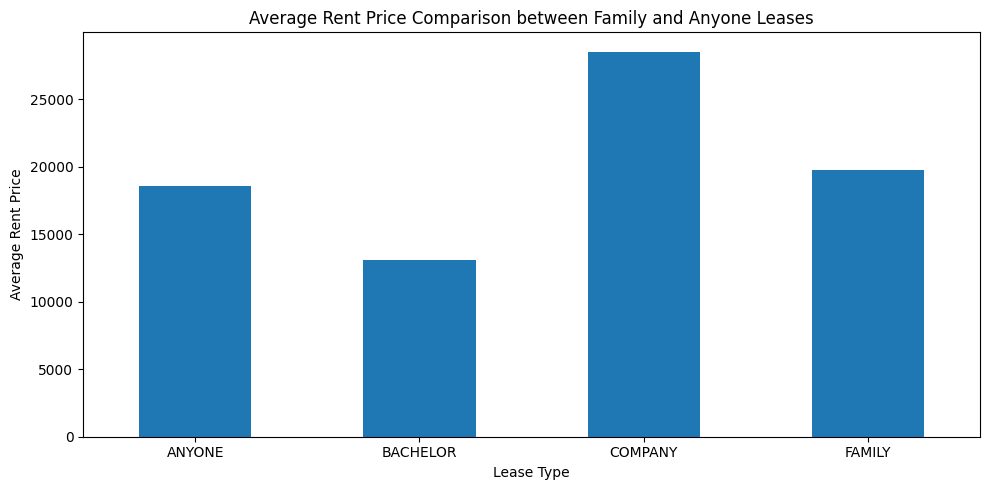

In [109]:
lease_type_stats = trained_cat_df.groupby('lease_type')['rent'].mean()

plt.figure(figsize=(10, 5))
lease_type_stats.plot(kind='bar', rot=0)
plt.xlabel('Lease Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price Comparison between Family and Anyone Leases')
plt.tight_layout()
plt.show()

#### 🏯Balconies and Rent:

> How does the number of balconies in a property impact its rent price?

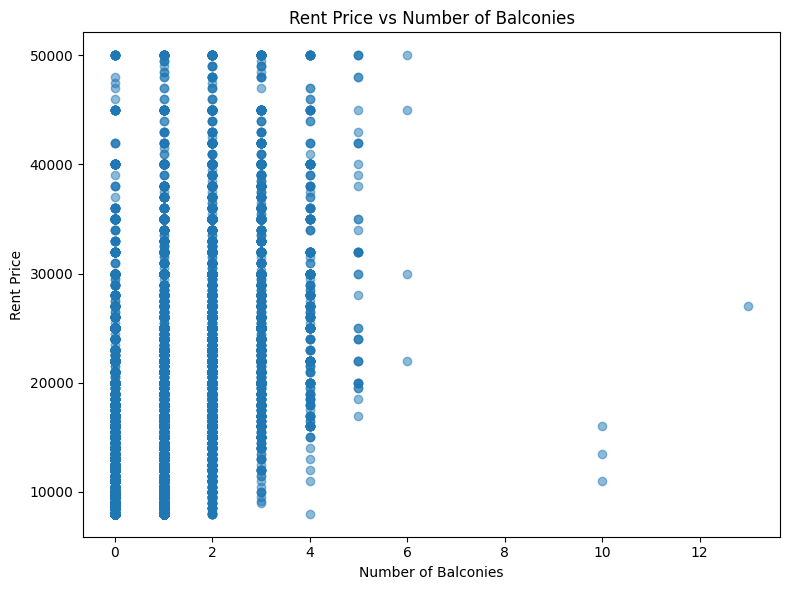

In [111]:
balcony_stats = df_trained.groupby('balconies')['rent'].mean()

plt.figure(figsize=(8, 6))
plt.scatter(df_trained['balconies'], df_trained['rent'], alpha=0.5)
plt.xlabel('Number of Balconies')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Number of Balconies')
plt.tight_layout()
plt.show()



> Is there a correlation between the property's facing direction and rent price?

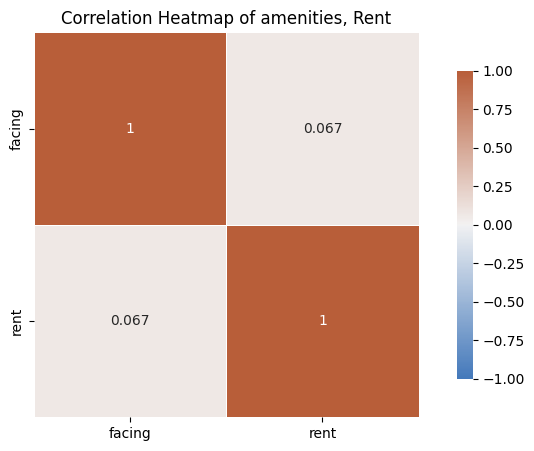

In [122]:
selected_columns = ['facing', 'rent']
df_selected4 = df_trained[selected_columns]
correlation_matrix2 = df_selected4.corr()

f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlation_matrix2, annot=True, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of amenities, Rent')
plt.show()

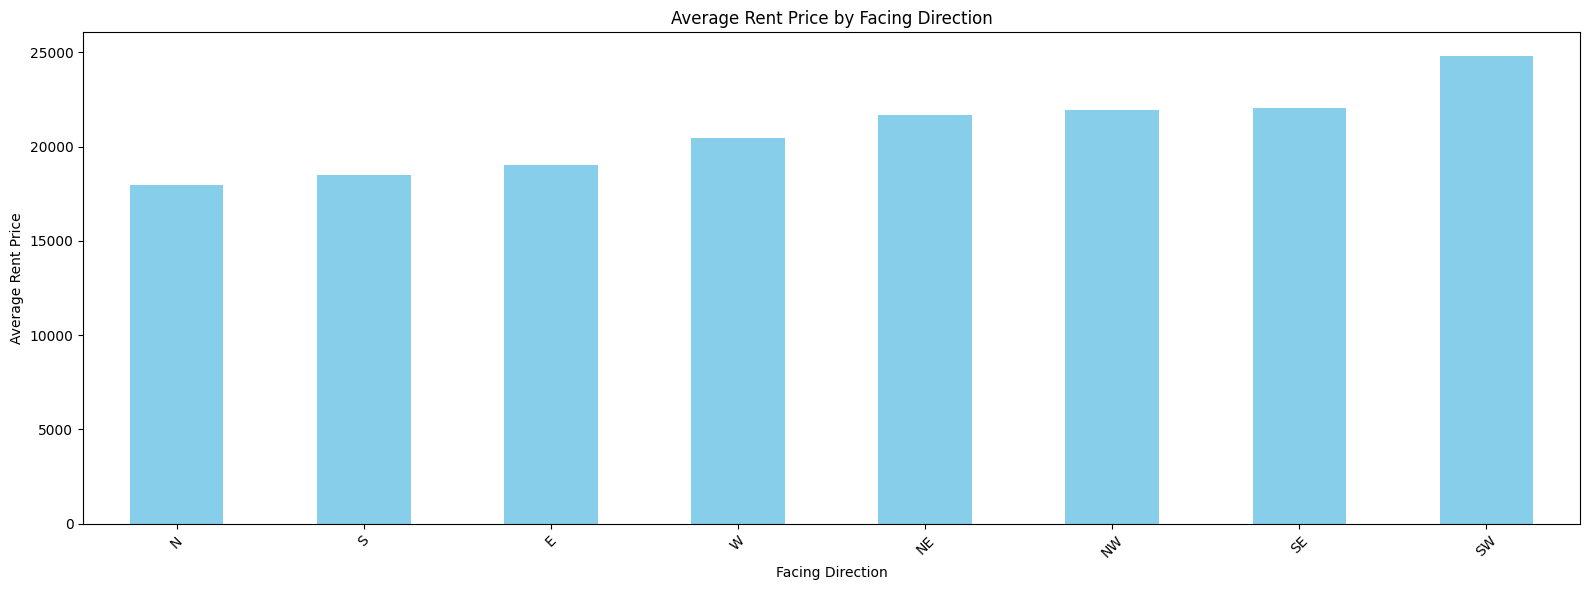

In [120]:
facing_direction_avg_rent = trained_cat_df.groupby('facing')['rent'].mean().sort_values()

plt.figure(figsize=(16, 6))
facing_direction_avg_rent.plot(kind='bar', color='skyblue')
plt.xlabel('Facing Direction')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Facing Direction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 🏊🏋️Amenities and Rent:

> Are certain amenities more strongly correlated with higher rent prices?

In [123]:
correlation_matrix = df_trained[['POOL', 'GYM', 'PARK', 'AC','INTERNET','rent']].corr()['rent']

correlation_matrix = correlation_matrix.sort_values(ascending=False)
print(correlation_matrix)

rent        1.000000
POOL        0.453536
GYM         0.437597
AC          0.234142
PARK        0.141708
INTERNET   -0.022608
Name: rent, dtype: float64


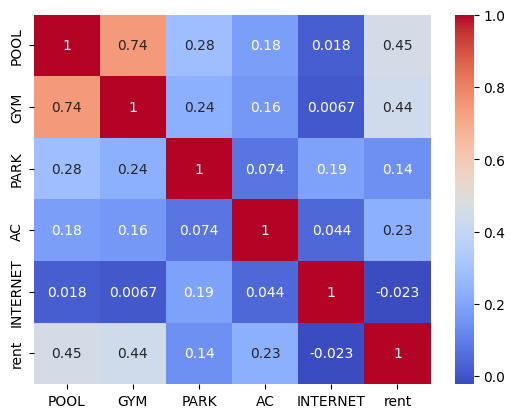

In [124]:
sns.heatmap(df_trained[['POOL', 'GYM', 'PARK', 'AC','INTERNET','rent']].corr(), annot=True, cmap='coolwarm')
plt.show()

> How does the availability of amenities like swimming pools or gyms affect rent?

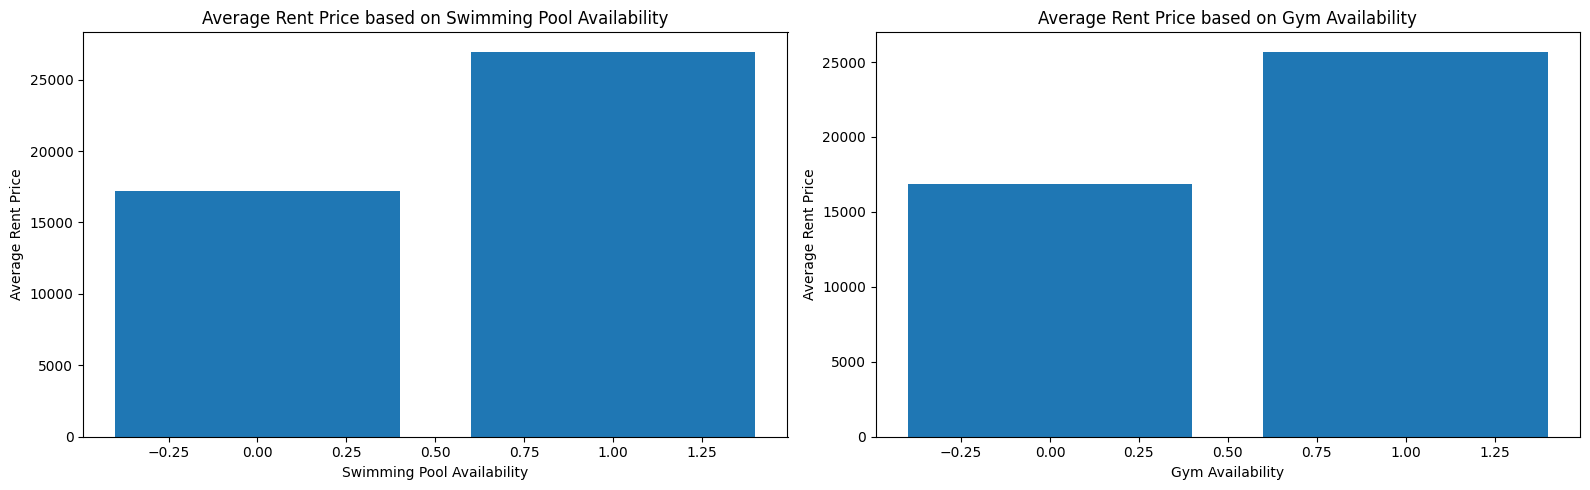

In [133]:
swimming_pool_avg_rent = trained_cat_df.groupby('POOL')['rent'].mean()
gym_avg_rent = trained_cat_df.groupby('GYM')['rent'].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].bar(swimming_pool_avg_rent.index, swimming_pool_avg_rent.values)
axes[0].set_xlabel('Swimming Pool Availability')
axes[0].set_ylabel('Average Rent Price')
axes[0].set_title('Average Rent Price based on Swimming Pool Availability')

axes[1].bar(gym_avg_rent.index, gym_avg_rent.values)
axes[1].set_xlabel('Gym Availability')
axes[1].set_ylabel('Average Rent Price')
axes[1].set_title('Average Rent Price based on Gym Availability')

plt.tight_layout()
plt.show()

#### 🚰Water Supply and Building Type:

>  Do properties with certain types of water supply tend to have higher rent?

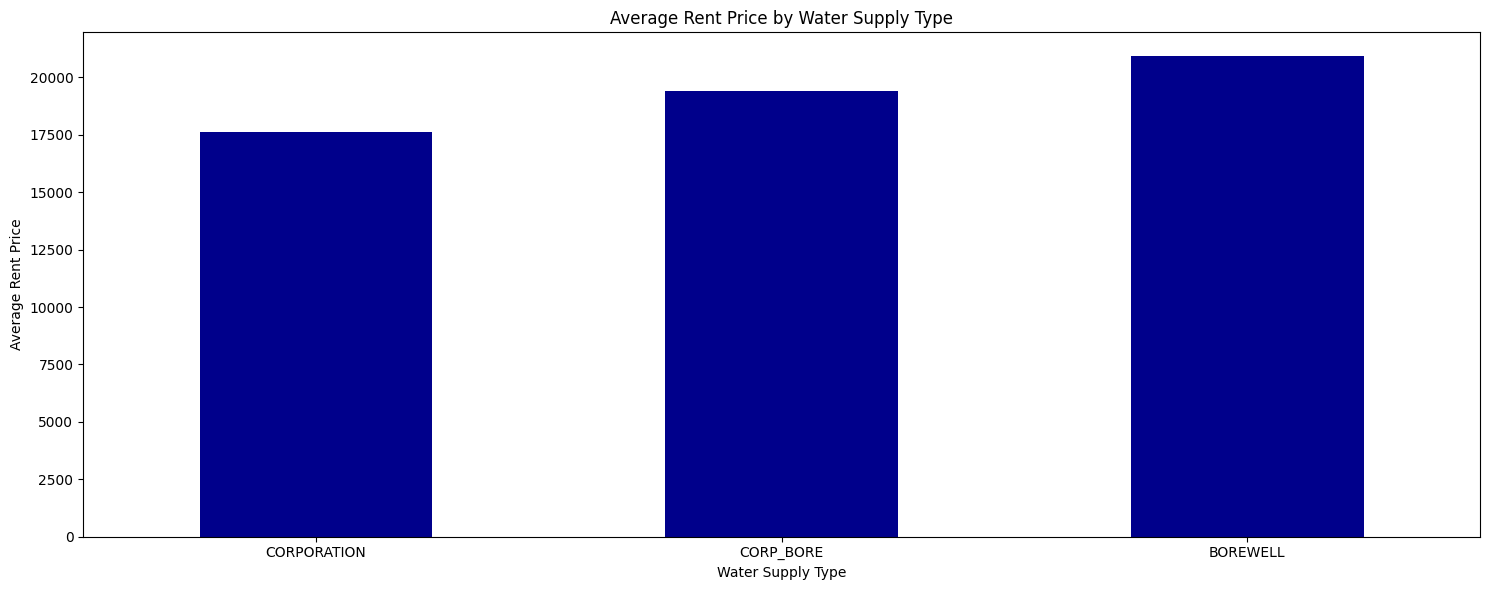

In [142]:
water_supply_avg_rent = trained_cat_df.groupby('water_supply')['rent'].mean().sort_values()

plt.figure(figsize=(15, 6))
water_supply_avg_rent.plot(kind='bar', color='darkblue')
plt.xlabel('Water Supply Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Water Supply Type')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

> Does the building type (e.g., IH, AP) have an influence on rent prices?

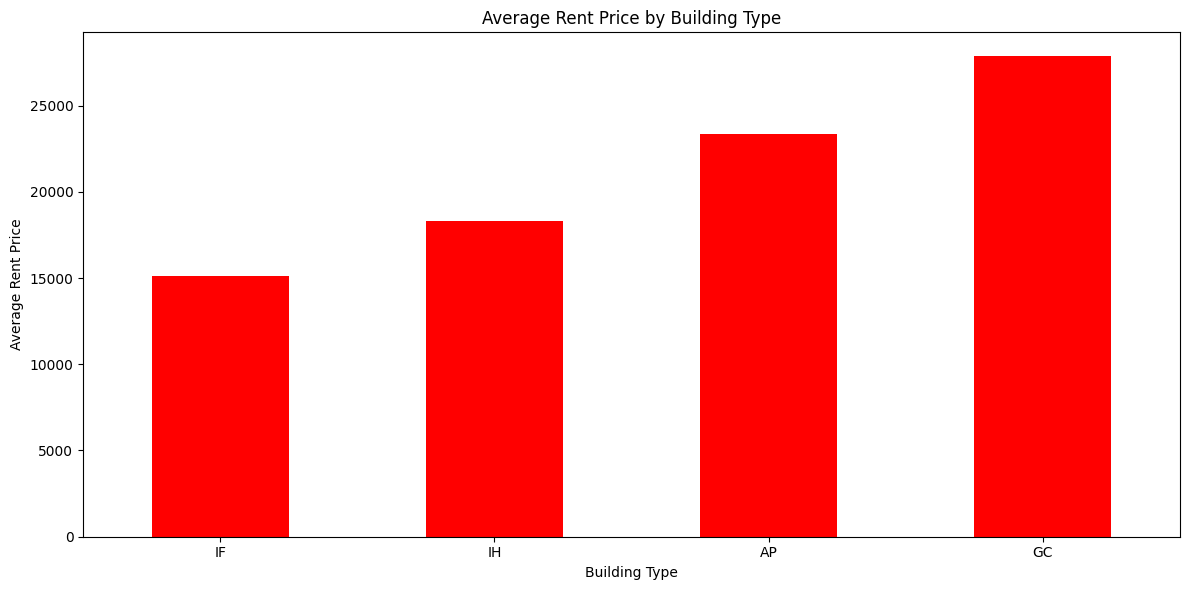

In [146]:
building_type_avg_rent = trained_cat_df.groupby('building_type')['rent'].mean().sort_values()

plt.figure(figsize=(12, 6))
building_type_avg_rent.plot(kind='bar', color='red')
plt.xlabel('Building Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Building Type')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

## ⚛️Predictive Analysis :

In [154]:
X = df_trained.drop(columns=['rent','id','locality','activation_date','floor_category']) 
y = df_trained['rent'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [155]:
feature_coefficients = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Feature coefficients:")
print(feature_coefficients)


Feature coefficients:
latitude             4797.259800
bathroom             3018.587225
AC                   2672.189482
longitude            2386.579382
furnishing           1986.165340
LIFT                 1123.687427
GP                    637.972020
gym                   562.821845
POOL                  543.580249
PB                    507.977196
parking               446.525675
total_floor           418.033592
INTERCOM              363.800213
negotiable            343.146869
FS                    278.323661
building_type         229.487508
CLUB                  189.562917
water_supply          144.329022
RWH                   141.137170
PARK                  137.126310
balconies             125.221658
property_age           94.586876
swimming_pool          52.297624
facing                 32.933701
SECURITY               27.992316
floor                  20.486169
property_size           6.983436
HK                      3.833293
cup_board               0.066821
property_age_days    